# GRIP @ The Sparks Foundation

### Data Science and Business Analytics Intern

###  Author - Anugraha S Ghosh

### Task 1 - Prediction Using Supervised ML

#### In this task, we have to predict the percentage score of students based upon the number of hours they studied.

#### This is a simple linear regression task as it involves just two variables.

In [3]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Step 1 : Loading the Data into Python Environment

In [4]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)

data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Step 2 : Descriptive Statistics

In [5]:
data.shape

(25, 2)

In [6]:
data.dtypes

Hours     float64
Scores      int64
dtype: object

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [8]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [9]:
data.nunique()

Hours     23
Scores    23
dtype: int64

In [10]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

#### There are no missing values in the dataset.

### Step 3 : Visualizing the Data

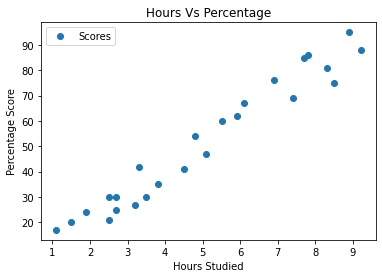

In [11]:
data.plot(x='Hours',y='Scores', style='o')
plt.title('Hours Vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

#### From the above graph, we can clearly see that there is a positive linear relationship between the number of hours studied and percentage score

In [13]:
data.corr(method='pearson')

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


<AxesSubplot:xlabel='Hours', ylabel='Density'>

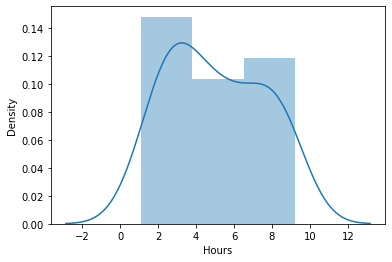

In [14]:
#distribution of Hours
sns.distplot(data['Hours'])

<AxesSubplot:xlabel='Scores', ylabel='Density'>

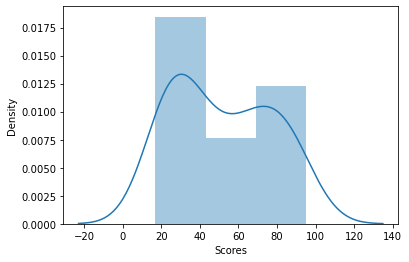

In [17]:
#distribution of Hours
sns.distplot(data['Scores'])

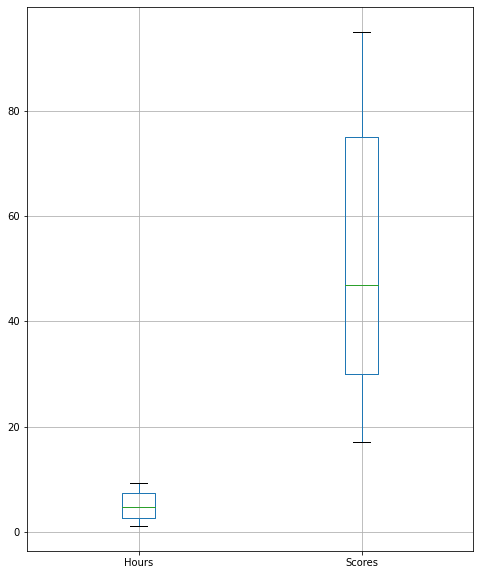

In [18]:
#Checking for outliers using boxplot
data.boxplot(figsize=(8,10))
plt.show()

#### No outliers are present in the data

### Step 4 - Preparing the Data

In [29]:
# Split the data into features and target
x = data.iloc[: , :-1].values
y = data.iloc[:, 1].values

### Step 5 - Model Building - Linear Regression

In [30]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [31]:
# Splitting data into training and testing data
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size = 0.2, random_state = 42)

In [32]:
# Creating an instance of the LinearRegression
lr = LinearRegression()

# Creating the model
model =lr.fit(x_train,y_train)

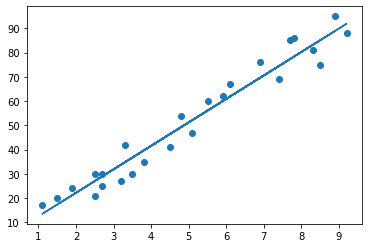

In [35]:
# Plotting the regression line
m = lr.coef_
c = lr.intercept_
line = m*x + c
plt.scatter(x, y)
plt.plot(x, line)
plt.show()

### Step 6 - Making Predictions

In [36]:
y_pred = model.predict(x_test)

In [37]:
# Comparing Actual vs Predicted
data1 =data.copy()
data1["predicted_scores"]=model.predict(data1[['Hours']])
data1

,Hours,Scores,predicted_scores
0,2.5,21,27.032088
1,5.1,47,52.205491
2,3.2,27,33.809542
3,8.5,75,85.124557
4,3.5,30,36.714166
5,1.5,20,17.350010
6,9.2,88,91.902011
7,5.5,60,56.078322
8,8.3,81,83.188141
9,2.7,25,28.968503


#### What would be the predicted score if a student studies for 9.25 hours per day?

In [39]:
score = model.predict([[9.25]])
print("If a student studies for 9.25 hours per day , he/she will score {} % in exam".format(score))

If a student studies for 9.25 hours per day , he/she will score [92.38611528] % in exam


### Step 7 - Model Evaluation

In [41]:
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error
print("Mean Absolute Error :", mean_absolute_error(y_test,y_pred))
print("R2 Score",r2_score(y_test,y_pred))

Mean Absolute Error : 3.9207511902099244
R2 Score 0.9678055545167994
